In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go



##import whatever you need


#Problem1(Logistic Regression) 

In this problem, we will use logistic regression to separate points inside a circle from the outside ones. the code below uses the random functions of the NumPy library to uniformly generate data inside a square A*A centered at (x1_0, x2_0). Points that lie inside the circle (x1_0,x2_0,R) get labeled 1 and vice versa.

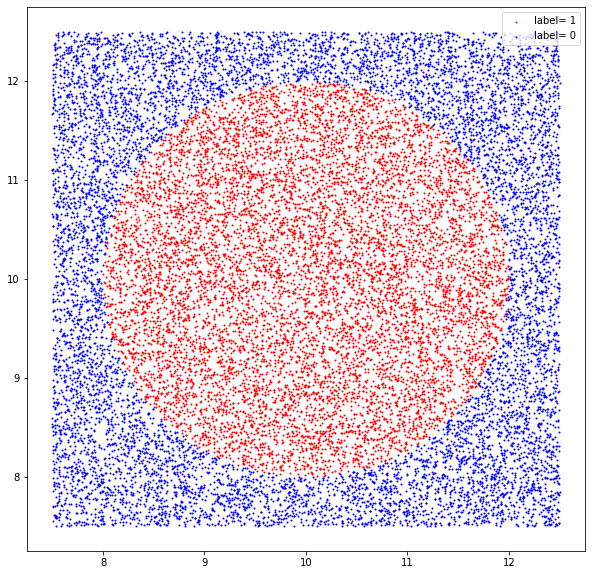

In [2]:

x1_0 = 10
x2_0 = 10
A = 5
N = 20000
R = 2

x1 = A *np.random.rand(N) + x1_0 - A/2
x2 = A *np.random.rand(N) + x2_0 - A/2
rr = np.square(x1-x1_0) + np.square(x2-x2_0) 
label = rr<= R**2 

plt.figure(figsize = (10,10))
plt.scatter(x1[label==1], x2[label==1],c='r', s= 1, label="label= 1")
plt.scatter(x1[label==0], x2[label==0],c='b' ,s =1, label="label= 0")
plt.legend()



Now we use Logistic regression to do so. [SciKit-learn](https://scikit-learn.org/stable/) have some amazing function to help you (Highly recommend using this library).



##Step 1
in this step, use x1 and x2 as input features.

You should do:

2. Split the data into the test set and train set (with ratio = 0.5).

1. Create a logistic regression model (without penalty).

2. Feed the training points into your model and train it.

3. Using your trained model, predict labels of the test set. 

4. Plot the data such that their color represents their predicted label (like the previous image).

### Input Features

In [93]:
#concat x1,x2
X = np.array([x1,x2]).T
y = label

### Split Data


In [94]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)

shape X_train: (10000, 2)
shape X_test: (10000, 2)

shape y_test: (10000,)
shape y_train: (10000,)


### Create Model & Train 

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [96]:
predicted = model.predict(X_test)

### Plot

In [97]:
X_test.T[0]

array([ 8.96997592, 11.448134  ,  9.61524924, ..., 12.38646334,
        7.66328073, 11.06657592])

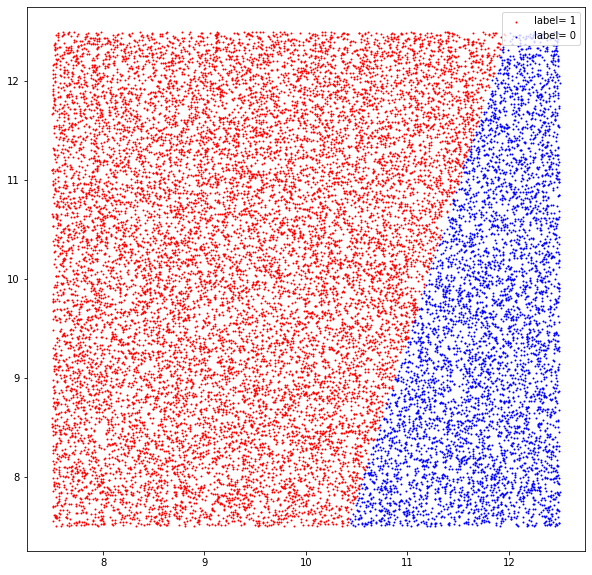

In [98]:
all_predict = model.predict(X)
plt.figure(figsize = (10,10))
plt.scatter(x1[all_predict==1], x2[all_predict==1],c='r', s= 1, label="label= 1")
plt.scatter(x1[all_predict==0], x2[all_predict==0],c='b' ,s =1, label="label= 0")
plt.legend()

In [99]:
## create model and predict labels

In [100]:
## plot


Answer these questions:

1. Explain what logistic regression is.

2. Write its formula for this problem (be specific about the dimension of the variables).

3. Learning is all about finding unknown parameters of the model to make it fit the training data. Point out the unknown parameters of your logistic regression model.


As you can probably see, your model is a big mess. 
Can you guess why?

Although the model work awful, we can use it to learn about the evaluation metrics.

(_"The evaluation of binary classifiers compares two methods of assigning a binary attribute, one of which is usually a standard method and the other is being investigated. There are many metrics that can be used to measure the performance of a classifier or predictor; different fields have different preferences for specific metrics due to different goals. For example, in medicine sensitivity and specificity are often used, while in computer science precision and recall are preferred."_)[[Wiki]](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers)


Answer these questions:

1. With respect to your model, specify TP, TN, FP, and FN points. (plot them in 4 different colors)

2. Explain the following metrics (do not forget their formula!!) and report them for your model: accuracy, precision (sensitivity), recall, and specificity 


3. In what kind of problems is recall more important than precision? Provide an example
<br>
4. In what kind of problems is precision more important than recall? Provide an example

In [101]:
#plot TP, TN, FP, FN

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

       False       0.70      0.36      0.48      4979
        True       0.57      0.84      0.68      5021

    accuracy                           0.61     10000
   macro avg       0.64      0.60      0.58     10000
weighted avg       0.64      0.61      0.58     10000




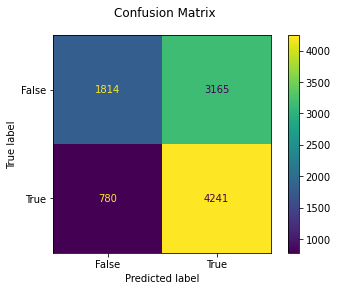

In [102]:
from sklearn import metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()
print('\n\n\n')
# .values.argmax(axis=1)  

In [103]:
## calculate metrics

##Step 2

Now it is time to do some serious work!

To train a model that actually works, we need to use something called [Kernel](https://en.wikipedia.org/wiki/Kernel_method). 
To put it simply, Kernel is a transformation that transforms input space into a feature space. By mapping the inputs to the feature space, we would have some features that are more usable for our model. In other words, sometimes our model is not that complex to extract those features by itself (e.g., linear regression), so Kernel does it for the model.

You should do:

1. Find a proper kernel for our problem (be careful! the circle was not centered at (0,0)).
2. Convert the inputs using the Kernel.
3. Feed the resulting features into the model and train it.
4. Evaluate your model on the test set (plot points with the predicted labels).
5. What is the accuracy of your model now? (Congratulation!!)


In [104]:
(X-10)**2

array([[2.45076727e+00, 3.37873423e+00],
       [2.27422254e+00, 4.33338127e+00],
       [5.56861326e-01, 4.98595052e+00],
       ...,
       [8.83365233e-01, 2.43300570e-03],
       [9.02737922e-01, 2.21081578e+00],
       [5.56717861e+00, 8.81309399e-01]])

In [105]:
X =(X-10)**2

In [106]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)

shape X_train: (10000, 2)
shape X_test: (10000, 2)

shape y_test: (10000,)
shape y_train: (10000,)


In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
predicted = model.predict(X_test)

In [109]:
X_test.T[0]

array([1.0609496 , 2.09709207, 0.14803315, ..., 5.69520727, 5.46025697,
       1.1375842 ])

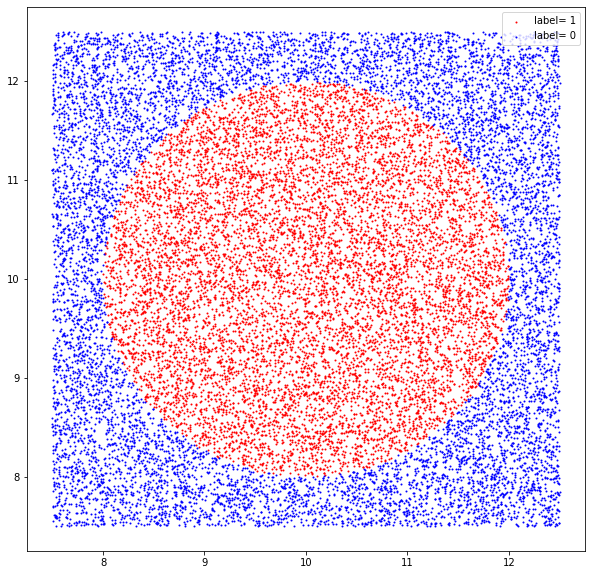

In [110]:
all_predict = model.predict(X)
plt.figure(figsize = (10,10))
plt.scatter(x1[all_predict==1], x2[all_predict==1],c='r', s= 1, label="label= 1")
plt.scatter(x1[all_predict==0], x2[all_predict==0],c='b' ,s =1, label="label= 0")
plt.legend()

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4979
        True       1.00      1.00      1.00      5021

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000




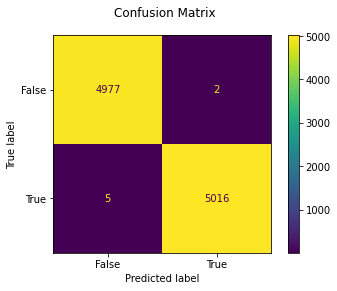

In [111]:
from sklearn import metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()
print('\n\n\n')
# .values.argmax(axis=1)  

In [112]:
## kernel

In [113]:
## train and predict

In [114]:
## plot

In [115]:
## calculate accuracy

#Problem2 (Gradient Descent)
In this problem, we use the gradient descent method to solve a regression problem and also play with some amazing 3D plots!

The code below generates 600 points of the function $z = x + y^2$ and adds Gaussian noise to each point.
Your job is to find the best regression that fits these noisy points.


In [116]:
#Do not change this block!!

def f(x, y) : return x + y**2

y = np.linspace(-6, 6, 12)
x = np.linspace(-40, 8, 50)

X, Y = np.meshgrid(x, y)
Z = f(X,Y)
Z_noise = Z + 9* np.random.randn(Z.shape[0], Z.shape[1])-2

Some visualizations!!

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


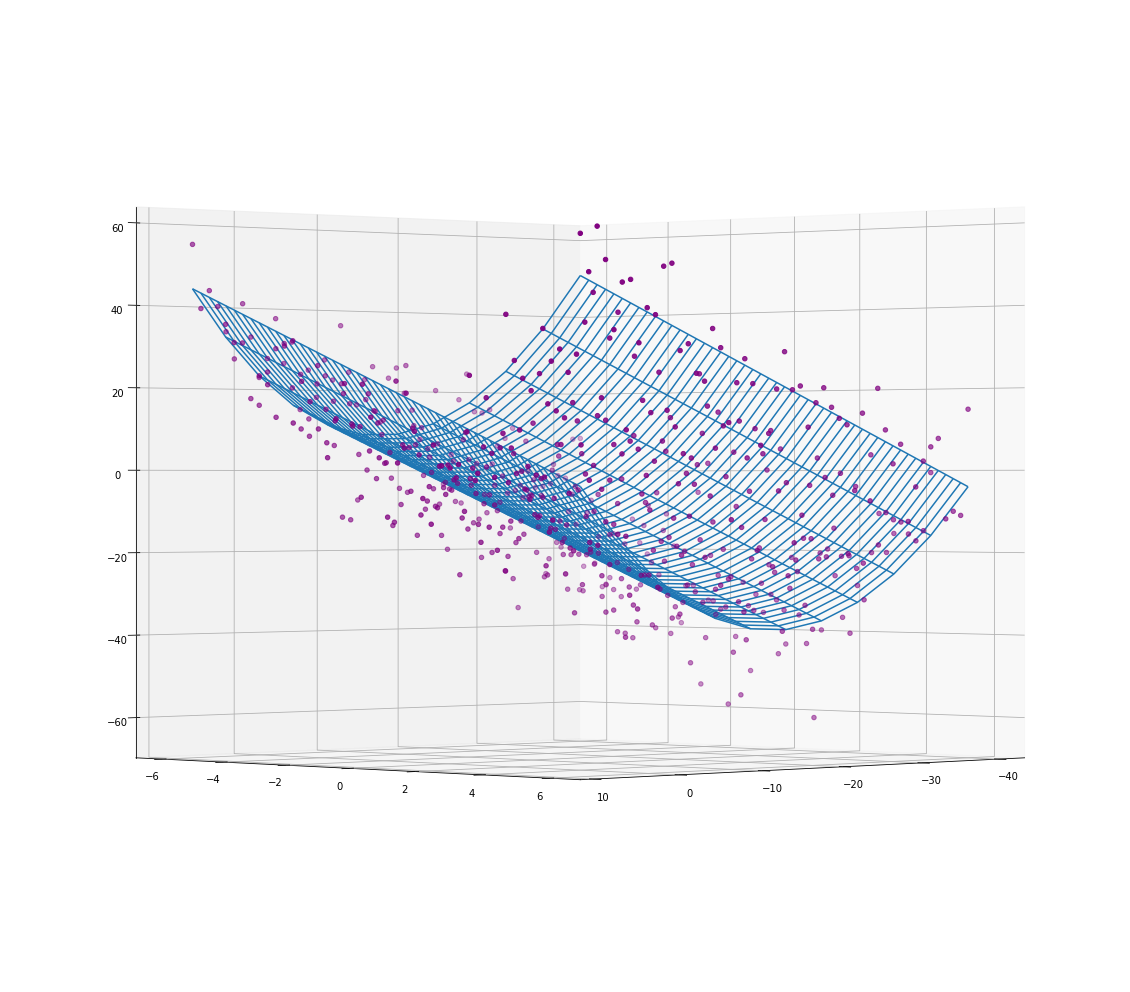

In [117]:
# %matplotlib notebook
fig = plt.figure(figsize=(20,18))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.scatter3D(X,Y, Z_noise, c ="purple")
ax.view_init(0,45) #you can change the viewpoint (also, if you are using Jupiter, uncomment the first line, and hopefully, the plot becomes interactive!)

Click and drag around.
Enjoy!!

In [ ]:

fig = go.Figure(data=[go.Scatter3d(x=X.reshape(-1), y=Y.reshape(-1), z=Z_noise.reshape(-1),  mode='markers',
    marker=dict(
        size=2,
        colorscale='Viridis',   # choose a colorscale
    )),
     go.Surface(z=Z, x=X, y = Y, opacity=.5,)
     ])


fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,   
)

fig.show()

##Step1

In this step, we use the LinearRegression model of SciKit-learn to find the best regression of given data.
To the end of problem2, assume we know that the regression function is of form $y=w_2*x_2^2 + w_1*x_1$. So use only X and Y**2 as inputs. 

You should do:
1. Create a LinearRegression model.
2. Prepare the inputs and train the model.
3. Find the output that your model predicts for input data, name it `predicted`
4. Use the code below to plot your estimated function and compare it with the original one.


In [ ]:

predicted = ## predict the outputs

In [ ]:
fig = go.Figure(data=[
     go.Surface(z=predicted.reshape(X.shape[0],X.shape[1]), x=X, y = Y, colorscale='Viridis',opacity=.1),
     go.Surface(z=Z, x=X, y = Y, opacity=.2,colorscale='Electric')
     ])
fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,   
)
fig.show()

##Step2

In this step, you need to get your hands dirty!
You are supposed to implement a gradian descent algorithm to solve linear regression.

Answer these questions:
1. Write the loss function formula for this problem.
2. Drive the derivation of the loss function.
3. Explain the impact of input normalization on the gradient descent algorithm.

You should do:
1. Using the derivation that you find, implement the `gradient_descent` function that returns the gradient and loss at the point `W`
2. Implement the gradian descent algorithm with the following considerations.

You should Consider:
1. Learning rate = 0.1
2. Repeat the algorithm for 200 iterations and save the w and loss in `all_w` and `losses` respectively after every 20 iterations.
3. the algorithm stop when $|w^{t+1} - w^t|_1 < T$
4. The start point is (0,0)
5. Do not forget to normalized the inputs ([Hint](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).

In [ ]:
def gradient_descent(W, x, y):

  #to do
  
  return gradient, loss 


learning_rate = 0.1
T = 1e-2
w = np.array((0, 0))
 
all_w = []
losses = []


X_scaled = ##



#to do





print('w =', all_w)


Use this code to see the progress of algorithm.

In [ ]:
import plotly.graph_objects as go

ww = np.array(all_w).reshape(-1,2)

w0 = np.linspace(ww[-1,0] - 8, ww[-1,0] +7, 100)
w1 = np.linspace(ww[-1,1] - 5, ww[-1,1] +4 , 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, Z_noise.reshape(-1))[1]


W0, W1 = np.meshgrid(w0,w1)




fig = go.Figure(data=[

     go.Surface(z=mse_vals, x=W0, y = W1, opacity=.5, contours = {
        
        "z": {"show": True, "start": 80, "end": 160, "size": 5}
    },),

    go.Scatter3d( x=ww[:,0],y=ww[:,1],
        z=np.array(losses),
        mode='lines',
        line=dict(
            color='red',
            width=2
        )),

     go.Scatter3d( x=ww[:,0],y=ww[:,1],
        z=np.array(losses),
        mode='markers',
        marker=dict(
            color='orange',
            
        )),
 
     ])

fig.update_layout(
    autosize=False,
    width=1300,
    height=1000,
   
)
fig.show()

#Problem3 (Regularization)



In this problem, we want to study the impact of $l_1$, and $l_2$ regularizers on overfitting.

We have a dataset consisting of 21 points that were generated using the $x^3$ function ( with added noise).


In [ ]:
#import whatever you need

##Step1

You should do:
1. Load the dataset from the file `data.csv`
2. Fit a polynomial regression[[Wiki]](https://en.wikipedia.org/wiki/Polynomial_regression) with $n=20$ to data.
3. Plot data, your estimated function, and the true function $x^3$ in a single plot.


In [ ]:
#load and fit data

In [ ]:
#plot

Answer these questions:
1. Explain why does overfitting happen?
2. Discuss about the training error and generalization error of this model.






##step2

You should do:
1. Add $l_2$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function $x^3$ in a single plot.

In [ ]:
#model with l2

In [ ]:
#plot

##Step3

You should do:
1. Add $l_1$ regularizer to your model ($λ=1$).
2. Plot data, your estimated function, and the true function $x^3$ in a single plot.

In [ ]:
#model with l1

In [ ]:
#plot

##Step4

For each model, plot a histogram of the value of their parameters ($w_i$).

In [ ]:
##plot (you can use subplot)

Answer these questions:

1. Compare the results of models.


2. Explain the impact of each regularizer? What do they do in general? 

2. Which is the best estimate of the true function $x^3$? Why?

3. Compare the histograms and discuss their differences.

4. Which regularize do you think is more robust to outlier data? Justify your answer